Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Classification and Regression**
**Name** | de Leon, Bryan Paul
**Section** | CPE32S3
**Date Performed**: | April 8 2024
**Date Submitted**: |
**Instructor**: | ENGR. Roman Richard
<hr> | <hr>

# PART 1: Classification Dataset

a) **Dataset Used**
- Apple Quality Classification (Good or Bad)

b) **Problem Being Addressed**
- The overall quality of apples are affected by several factors, most notably planting, picking and storage procedures. The timely harvesting and handling methods are essential in order to reduce damage to the apples and effectively maintain freshness.

# PART 2: Classification Dataset Pre-Processing

In [ ]:
#importing the dataset

import pandas as pd
appleClassification = pd.read_csv('apple_quality.csv')

#checking the attributes of the dataset

appleClassification.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [ ]:
#checking null values

appleClassification.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

**Analysis**
- In the given output, we can see that the quality variable is denoted in strings, we can further improve this by changing it to represent binary values instead by using the lambda function. Furthermore, we can see that some instances possess negative size and weights, this could be indicative of a quality score instead of the actual weight, as the numbers are not denoted in kg. This context could be applied for the different attributes as well.

In [ ]:
#dropping the instances which possesses a null value

appleClassification.dropna(inplace = True)

#checking null values

appleClassification.isnull().sum()


A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
#checking the dataset

appleClassification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


**Analysis**
- Further checking the dataset, we can see that acidity is in the object datatype, we can improve the dataset by changing it from oject to float64, as object is usually used when we have string data

In [ ]:
#changing acidity from object to float64

appleClassification['Acidity'] = appleClassification['Acidity'].astype(float)

#verifying changes

appleClassification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


**Analysis**
- Now that we had changed the datatype from object to float, we can proceed to clean the data accordingly.

In [ ]:
#replacing good to 1 and bad to 0

appleClassification['Quality'] = appleClassification['Quality'].apply(lambda toLabel: 0 if toLabel == 'bad' else 1)

#verify changes

appleClassification.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [ ]:
#dropping a_id

appleClassification.drop(columns = ["A_id"], inplace = True)


In [ ]:
#verifying changes

appleClassification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


**Analysis**
- As the A_ID does not correspond to a unique identifier, we can drop the A_ID column completely.

# PART 3: Model Creation

In [ ]:
#correlation analysis

appleClassification.corr(method = 'pearson')

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split
columnsdata = ['Size', 'Weight', 'Sweetness','Crunchiness', 'Juiciness',
               'Ripeness', 'Acidity']
x = appleClassification[list(columnsdata)].values
y = appleClassification['Quality'].values


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [ ]:
#creating the model

from keras.models import Sequential
from keras.layers import Dense

#hidden layer

model = Sequential()
model.add(Dense(5, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))

#output layer

model.add(Dense(1, activation = 'sigmoid'))

#model training

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
hist = model.fit(x_train, y_train, epochs = 300, batch_size = 50, validation_split = 0.3)

Epoch 1/300
40/40 [==============================] - 1s 8ms/step - loss: 0.7103 - accuracy: 0.5048 - val_loss: 0.7069 - val_accuracy: 0.5339
Epoch 2/300
40/40 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5365 - val_loss: 0.7002 - val_accuracy: 0.5458
Epoch 3/300
40/40 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5549 - val_loss: 0.6954 - val_accuracy: 0.5577
Epoch 4/300
40/40 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5630 - val_loss: 0.6905 - val_accuracy: 0.5636
Epoch 5/300
40/40 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5870 - val_loss: 0.6840 - val_accuracy: 0.5850
Epoch 6/300
40/40 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6120 - val_loss: 0.6780 - val_accuracy: 0.5898
Epoch 7/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6289 - val_loss: 0.6698 - val_accuracy: 0.6136
Epoch 8/300
4

# PART 4: Classification Model Evalutation


In [ ]:
#model evaluation

score = model.evaluate(x_test, y_test)
print(score)

38/38 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8742
[0.32029959559440613, 0.8741666674613953]


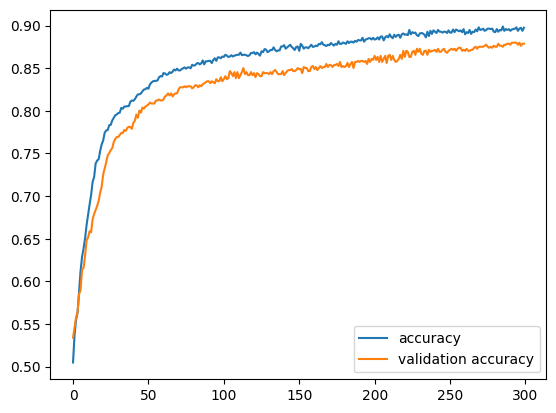

In [ ]:
hist.history.keys()

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend()
plt.show()

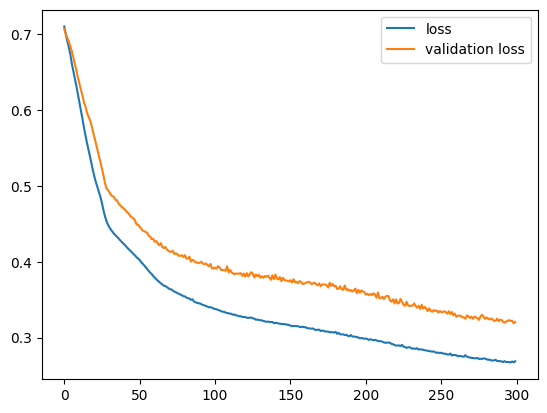

In [ ]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)
all_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"Fold {fold+1}/{n_folds}")

    #splitting the training data into folds
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # model to be evaluated
    model = Sequential()
    model.add(Dense(5, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0, validation_data=(x_val_fold, y_val_fold))
    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Validation accuracy: {scores[1]}")
    all_scores.append(scores[1])


print(f"Average validation accuracy: {np.mean(all_scores)}")


Fold 1/5
Validation accuracy: 0.7749999761581421
Fold 2/5
Validation accuracy: 0.6696428656578064
Fold 3/5
Validation accuracy: 0.7357142567634583
Fold 4/5
Validation accuracy: 0.6982142925262451
Fold 5/5
Validation accuracy: 0.7428571581840515
Average validation accuracy: 0.7242857098579407



**Analysis**
- After evaluating the model, we can see that it performed moderately well for unseen data, verifying the graph shows that validation_accuracy closely follows the training_accuracy, this could indicate that the model is generalizing well on unseen data. The slightly higher training_accuracy is not indicative of overfitting, as overfitting usually means that model significantly performs well on training_data. However, it is worth noting that adding more epochs significantly improves our ability to evaluate the model

# Classification Alternate Model | Adding More Epochs

In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split
columnsdata = ['Size', 'Weight', 'Sweetness','Crunchiness', 'Juiciness',
               'Ripeness', 'Acidity']
x2 = appleClassification[list(columnsdata)].values
y2 = appleClassification['Quality'].values


x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.3)

In this model, we've doubled the number of epochs from 300 to 600, while maintaining the same model structure.

In [ ]:
#creating the model

from keras.models import Sequential
from keras.layers import Dense

#hidden layer

model2 = Sequential()
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(3, activation = 'relu'))

#output layer

model2.add(Dense(1, activation = 'sigmoid'))

#model training

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
hist2 = model2.fit(x2_train, y2_train, epochs = 600, batch_size = 100, validation_split = 0.3) #adding more epochs

Epoch 1/600
20/20 [==============================] - 1s 15ms/step - loss: 0.7129 - accuracy: 0.5043 - val_loss: 0.7104 - val_accuracy: 0.5196
Epoch 2/600
20/20 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5125 - val_loss: 0.6994 - val_accuracy: 0.5303
Epoch 3/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5329 - val_loss: 0.6898 - val_accuracy: 0.5446
Epoch 4/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5513 - val_loss: 0.6803 - val_accuracy: 0.5636
Epoch 5/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5692 - val_loss: 0.6706 - val_accuracy: 0.5707
Epoch 6/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.5860 - val_loss: 0.6599 - val_accuracy: 0.5898
Epoch 7/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6023 - val_loss: 0.6485 - val_accuracy: 0.6040
Epoch 8/600


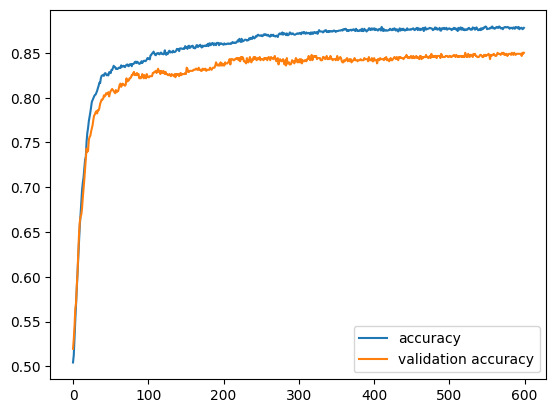

In [ ]:
hist2.history.keys()

import matplotlib.pyplot as plt
plt.plot(hist2.history['accuracy'], label = 'accuracy')
plt.plot(hist2.history['val_accuracy'], label = 'validation accuracy')

plt.legend()
plt.show()

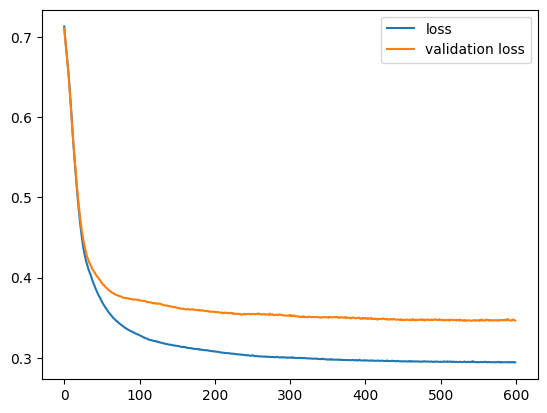

In [ ]:
hist2.history.keys()

import matplotlib.pyplot as plt
plt.plot(hist2.history['loss'], label = 'loss')
plt.plot(hist2.history['val_loss'], label = 'validation loss')

plt.legend()
plt.show()

# Classification Plot

In [ ]:
applePlot = pd.read_csv('apple_quality.csv')
applePlot['Quality'] = applePlot['Quality'].apply(lambda toLabel: 0 if toLabel == 'bad' else 1)

In [ ]:
#classification

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y3 = applePlot['Quality'].values

#label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_plot = le.fit_transform(y3)


In [ ]:
#splitting of dataset

columnsdata_plot = ['Sweetness', 'Juiciness']
x3 = applePlot[list(columnsdata_plot)].values

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y_plot, test_size = 0.3)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x3_train = sc.fit_transform(x3_train)
x3_test = sc.transform(x3_test)

#training of KNN model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'manhattan', p = 1)
classifier.fit(x3_train, y3_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1)

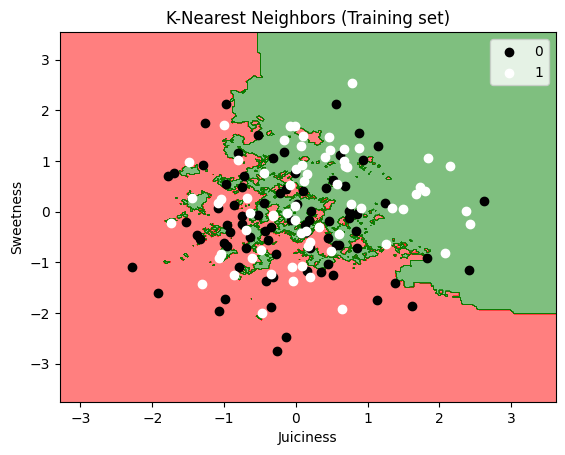

In [ ]:
#application of KNN

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


x3_set, y3_set = x3_test[:150], y3_test[:150]

X1, X2 = np.meshgrid(np.arange(start=x3_set[:, 0].min() - 1, stop=x3_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x3_set[:, 1].min() - 1, stop=x3_set[:, 1].max() + 1, step=0.01))

# Plotting decision boundaries
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the selected points with value 0
plt.scatter(x3_set[y3_set == 0, 0], x3_set[y3_set == 0, 1], c='black', label='0')

# Plotting the selected points with value 1 with green mask
plt.scatter(x3_set[y3_set == 1, 0], x3_set[y3_set == 1, 1], c='white', label='1')

# Adding title and labels
plt.title('K-Nearest Neighbors (Training set)')
plt.xlabel('Juiciness')
plt.ylabel('Sweetness')
plt.legend()
plt.show()

# Classification Analysis

- In this classification analysis problem, we've utilized the apple perfection dataset in order to predict which attributes possessed by an apple would be tagged as good or bad. This effectively solves the problem wherein this process is usually done manually, the implementation of this model would significantly improve efficiency

- Furthermore, our model did not exhibit overfitting or underfitting as indicative by the validation_loss and loss graphs, wherein we can notice that validation_loss is not significantly higher than loss, and not too close to the training loss.






---



# PART 1: Regression Dataset
a) **Dataset Used**:
- Hypertension Risk

b) **Problem Being Addressed**
- The dataset aims to provide a comprehensive overview of the factors that could contribute to hypertension, which could ultimately contribute to prediction models.

# PART 2: Regression Data Pre-Processing

In [ ]:
#loading libraries

import numpy as np
import pandas as pd

#importing the dataset

hypertensionFrame = pd.read_csv('Hypertension-risk-model-main.csv')
hypertensionFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [ ]:
hypertensionFrame.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#checking null values

hypertensionFrame.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [ ]:
#filling glucose with the mean of all

hypertensionFrame['glucose'].fillna(hypertensionFrame['glucose'].mean(), inplace = True)

#dropping null values

hypertensionFrame.dropna(inplace = True)

In [ ]:
#verifying changes

hypertensionFrame.isnull().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64

In [ ]:
#checking the final number of data

hypertensionFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4090 non-null   int64  
 1   age            4090 non-null   int64  
 2   currentSmoker  4090 non-null   int64  
 3   cigsPerDay     4090 non-null   float64
 4   BPMeds         4090 non-null   float64
 5   diabetes       4090 non-null   int64  
 6   totChol        4090 non-null   float64
 7   sysBP          4090 non-null   float64
 8   diaBP          4090 non-null   float64
 9   BMI            4090 non-null   float64
 10  heartRate      4090 non-null   float64
 11  glucose        4090 non-null   float64
 12  Risk           4090 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 447.3 KB


**Analysis**

- After dropping the null values, we are left 4090 instances of data, I decided to not drop the glucose null values as doing so will result in a substantial loss of 3 of data, not to mention the added loss from dropping the instances with missing cigsPerDay, BPMeds, totChol, BMI and heartrate.

# PART 2: Regression Plot

In [ ]:
#importing libraries

import matplotlib.pyplot as plt

#separating the male and female datas

menDf = hypertensionFrame[hypertensionFrame['male'] == 1]
womenDf = hypertensionFrame[hypertensionFrame['male'] == 0]

In [ ]:
#plotting of male data

menDf.corr(method = 'pearson')

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,-0.151237,-0.168998,0.065615,0.106486,0.046188,0.243618,0.055936,-0.011366,-0.034249,0.092006,0.163058
currentSmoker,NaN,-0.151237,1.000000,0.783737,-0.050670,-0.077715,0.043228,-0.057628,-0.066115,-0.175248,0.137305,-0.066394,-0.040488
cigsPerDay,NaN,-0.168998,0.783737,1.000000,-0.039740,-0.068948,0.050230,-0.040751,-0.042316,-0.098409,0.158703,-0.061832,-0.028039
BPMeds,NaN,0.065615,-0.050670,-0.039740,1.000000,0.000386,0.027203,0.239486,0.165855,0.034333,0.044072,-0.008692,0.209258
diabetes,NaN,0.106486,-0.077715,-0.068948,0.000386,1.000000,-0.000476,0.065119,0.005313,0.056061,0.055876,0.623749,0.031363
totChol,NaN,0.046188,0.043228,0.050230,0.027203,-0.000476,1.000000,0.111371,0.125252,0.109225,0.114220,0.032410,0.094396
sysBP,NaN,0.243618,-0.057628,-0.040751,0.239486,0.065119,0.111371,1.000000,0.772126,0.225189,0.207246,0.069060,0.659793
diaBP,NaN,0.055936,-0.066115,-0.042316,0.165855,0.005313,0.125252,0.772126,1.000000,0.312796,0.196874,0.006623,0.601426
BMI,NaN,-0.011366,-0.175248,-0.098409,0.034333,0.056061,0.109225,0.225189,0.312796,1.000000,0.092031,0.041432,0.223832


<Axes: ylabel='Risk'>

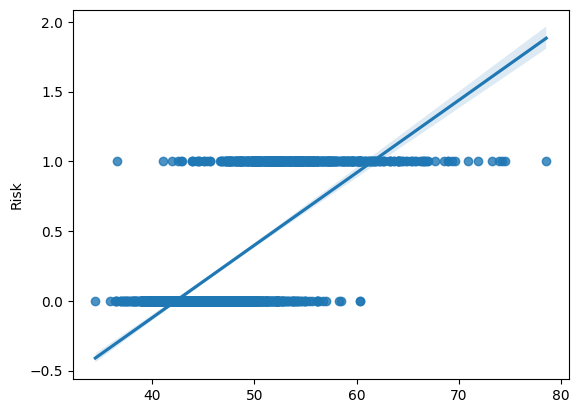

In [ ]:
import seaborn as sns

menRiskFactors = menDf[['BMI', 'BPMeds', 'sysBP', 'diaBP', 'currentSmoker']].mean(axis=1)
sns.regplot(x=menRiskFactors, y='Risk',  data=menDf)


**Analysis**

- The upward line denotes that there is a positive correlation between the selected columns in MenRiskFactors and the likelihood of hypertension, indicating that when these variables increase, then the risk of hypertension increases as well.

In [ ]:
#women correlation analysis

womenDf.corr(method = 'pearson')

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,-0.263458,-0.233412,0.160112,0.104534,0.415818,0.483575,0.314008,0.225842,0.000184,0.131973,0.411802
currentSmoker,NaN,-0.263458,1.000000,0.775628,-0.034040,-0.021999,-0.092148,-0.170253,-0.164166,-0.202598,0.041883,-0.042897,-0.158139
cigsPerDay,NaN,-0.233412,0.775628,1.000000,-0.024226,-0.016658,-0.068429,-0.126341,-0.116412,-0.162683,0.071973,-0.052679,-0.125330
BPMeds,NaN,0.160112,-0.034040,-0.024226,1.000000,0.091532,0.107170,0.266414,0.219529,0.138463,-0.011473,0.088765,0.294659
diabetes,NaN,0.104534,-0.021999,-0.016658,0.091532,1.000000,0.080350,0.131341,0.088504,0.107149,0.056401,0.597019,0.115098
totChol,NaN,0.415818,-0.092148,-0.068429,0.107170,0.080350,1.000000,0.267306,0.203140,0.138816,0.061056,0.055247,0.214419
sysBP,NaN,0.483575,-0.170253,-0.126341,0.266414,0.131341,0.267306,1.000000,0.801822,0.385523,0.165191,0.169415,0.721944
diaBP,NaN,0.314008,-0.164166,-0.116412,0.219529,0.088504,0.203140,0.801822,1.000000,0.419219,0.178857,0.100803,0.624254
BMI,NaN,0.225842,-0.202598,-0.162683,0.138463,0.107149,0.138816,0.385523,0.419219,1.000000,0.075136,0.112525,0.356846


<Axes: ylabel='Risk'>

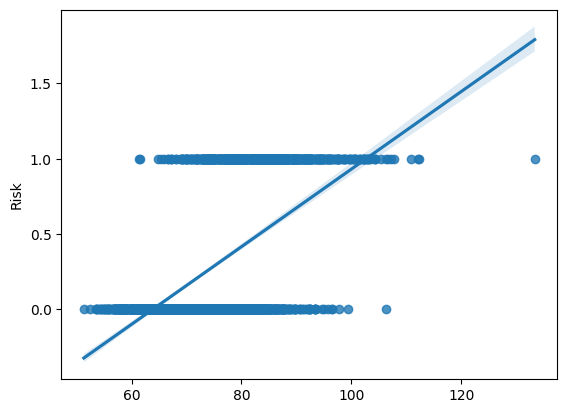

In [ ]:
#female data plot

womenRiskFactors = womenDf[['age', 'BPMeds', 'totChol', 'sysBP', 'diaBP','BMI', 'currentSmoker']].mean(axis=1)
sns.regplot(x=womenRiskFactors, y='Risk',  data=womenDf)

**Analysis**

- The womenDf exhibits a similar output to the menDf graph. However, further analyzing the correlation, we can notice that there are different risk factors between the genders, most notably age, wherein older women are at higher risk of hypertension as compared to men.

# PART 3: Performing Regression
**Linear Regression**

In [ ]:
#libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#performing regression on the positive men dataset

menPositiveDf = menDf[menDf['Risk'] == 1]
x_male = menPositiveDf[['age', 'BPMeds', 'diaBP', 'BMI', 'heartRate', 'totChol']]
y_male = menPositiveDf['sysBP']

#standardizing the male x dataset

sc =  StandardScaler()
x_male_scaled = sc.fit_transform(x_male)

#splitting the male data into train and test

x_male_train, x_male_test, y_male_train, y_male_test = train_test_split(x_male_scaled, y_male, test_size = 0.3, random_state = 1)



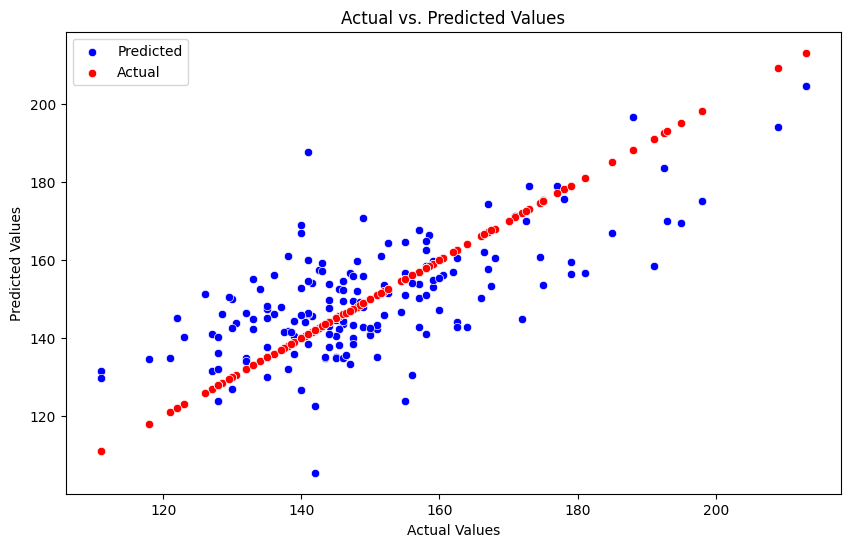

In [ ]:
#fitting the male data into the model

model_male = LinearRegression()
model_male.fit(x_male_train, y_male_train)

#prediction and mean squared error

y_male_pred = model_male.predict(x_male_test)
mse_male = mean_squared_error(y_male_test, y_male_pred)

#plotting the figure

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_male_test, y=y_male_pred, color='blue', label='Predicted')
sns.scatterplot(x=y_male_test, y=y_male_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

**Analysis**
- For this instance, we've separated the positive dataset from the negative dataset, using sysBP as the basis that will be predicted by the model as it shown to be a better indicator of hypertension risk. The model will then aim to predict the level of systolic blood pressure as the risk factor increases, though the model plots the predicted values close to the actual values, there are still some instances where the prediction deviates from the actual value.

- Furthemore according to Strandberg and Pitkala (2003):
> "Generally, in studies in which readings of systolic and diastolic blood pressure have been compared, systolic blood pressure has been a better predictor of risk. Moreover, isolated systolic hypertension predicts risk better than isolated diastolic hypertension"



In [ ]:
#performing linear regression on female positive data

#performing regression on the positive men dataset

womenPositiveDf = womenDf[womenDf['Risk'] == 1]
x_female = womenPositiveDf[['age', 'BPMeds', 'diaBP', 'BMI',  'diabetes','totChol', 'currentSmoker']]
y_female = womenPositiveDf['sysBP']

#standardizing the male x dataset


x_female_scaled = sc.fit_transform(x_female)

#splitting the male data into train and test

x_female_train, x_female_test, y_female_train, y_female_test = train_test_split(x_female_scaled, y_female, test_size = 0.3, random_state = 42)



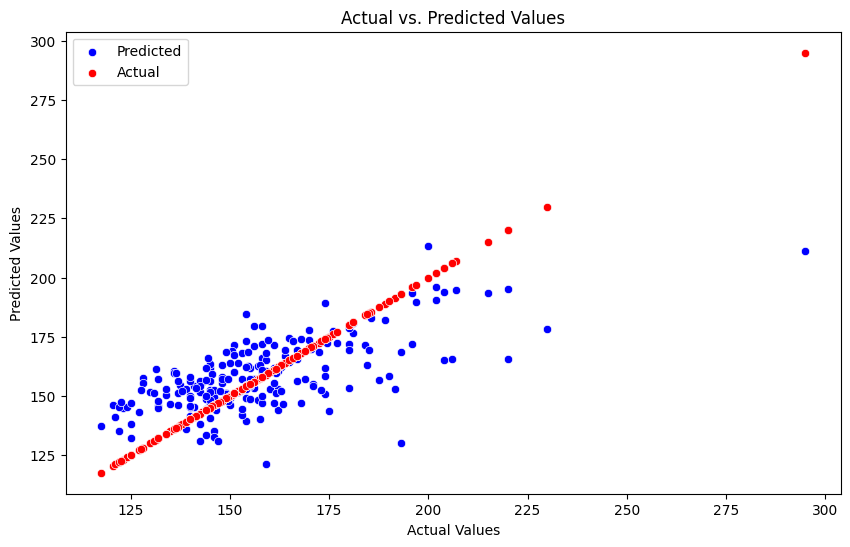

In [ ]:
#fitting the male data into the model

model_female = LinearRegression()
model_female.fit(x_female_train, y_female_train)

#prediction and mean squared error

y_female_pred = model_female.predict(x_female_test)
mse_female = mean_squared_error(y_female_test, y_female_pred)

#plotting the figure

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_female_test, y=y_female_pred, color='blue', label='Predicted')
sns.scatterplot(x=y_female_test, y=y_female_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

**Neural Network for Linear Regression on Male Dataset (Large Network)**

In [ ]:
#splitting the dataset

menPositiveDf = menDf[menDf['Risk'] == 1]
x2_male = menPositiveDf[['age', 'BPMeds', 'diaBP', 'BMI', 'heartRate', 'totChol']]
y2_male = menPositiveDf['sysBP']

#standardizing the male x dataset

sc =  StandardScaler()
x2_male_scaled = sc.fit_transform(x2_male)

#splitting the male data into train and test

x2_male_train, x2_male_test, y2_male_train, y2_male_test = train_test_split(x2_male_scaled, y2_male, test_size = 0.3)



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.initializers import RandomUniform


model2 = Sequential([
    Dense(128, activation='relu', kernel_initializer=RandomUniform(minval=-1, maxval=1), input_shape=(x_male_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation ='relu')
])

model2.compile(Adam(lr=0.005), loss="mean_squared_error", metrics=["mse"])
history = model2.fit(x2_male_train, y2_male_train, epochs=150, batch_size=18, validation_split=0.3)

# Evaluate the model
y2_male_pred_nn = model2.predict(x2_male_test)
mse_male_nn = mean_squared_error(y2_male_test, y2_male_pred_nn)



Epoch 1/150
16/16 [==============================] - 1s 16ms/step - loss: 21519.0820 - mse: 21519.0820 - val_loss: 20428.5078 - val_mse: 20428.5078
Epoch 2/150
16/16 [==============================] - 0s 5ms/step - loss: 18363.9121 - mse: 18363.9121 - val_loss: 16031.6885 - val_mse: 16031.6885
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 12794.4590 - mse: 12794.4590 - val_loss: 9197.8174 - val_mse: 9197.8174
Epoch 4/150
16/16 [==============================] - 0s 5ms/step - loss: 6320.3271 - mse: 6320.3271 - val_loss: 3564.4412 - val_mse: 3564.4412
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 3257.5457 - mse: 3257.5457 - val_loss: 2501.7478 - val_mse: 2501.7478
Epoch 6/150
16/16 [==============================] - 0s 5ms/step - loss: 2866.7798 - mse: 2866.7798 - val_loss: 2156.6399 - val_mse: 2156.6399
Epoch 7/150
16/16 [==============================] - 0s 4ms/step - loss: 2515.1841 - mse: 2515.1841 - val_loss: 2040.5985 - val_mse

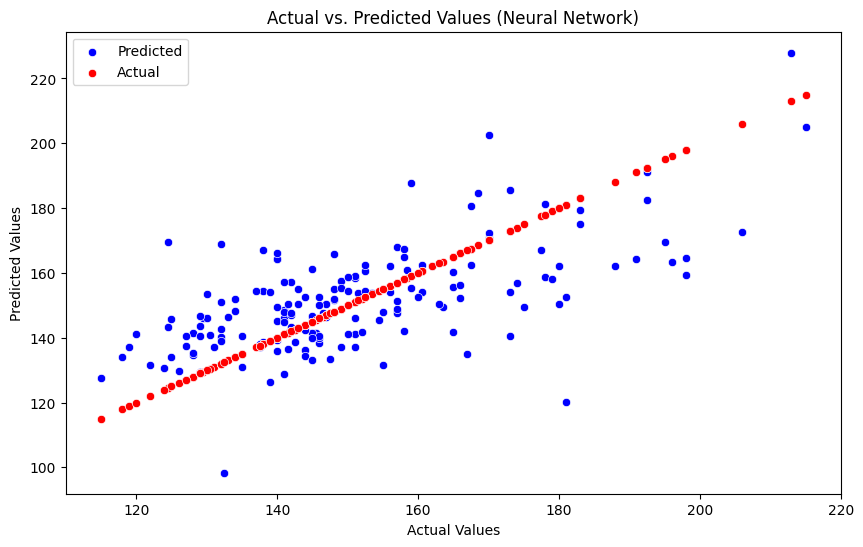

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y2_male_test, y=y2_male_pred_nn.flatten(), color='blue', label='Predicted')
sns.scatterplot(x=y2_male_test, y=y2_male_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.legend()
plt.show()

**Neural Network for Linear Regression on Male Dataset (Small Network)**

In [ ]:
#splitting the dataset

menPositiveDf = menDf[menDf['Risk'] == 1]
x3_male = menPositiveDf[['age', 'BPMeds', 'diaBP', 'BMI', 'heartRate', 'totChol']]
y3_male = menPositiveDf['sysBP']

#standardizing the male x dataset

sc =  StandardScaler()
x3_male_scaled = sc.fit_transform(x3_male)

#splitting the male data into train and test

x3_male_train, x3_male_test, y3_male_train, y3_male_test = train_test_split(x3_male_scaled, y3_male, test_size = 0.3)



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.initializers import RandomUniform


model3 = Sequential([
    Dense(20, activation='relu', kernel_initializer=RandomUniform(minval=-1, maxval=1), input_shape=(x_male_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1, activation ='relu')
])

model3.compile(Adam(lr=0.005), loss="mean_squared_error", metrics=["mse"])
history3 = model3.fit(x3_male_train, y3_male_train, epochs=150, batch_size=18, validation_split=0.3)

# Evaluate the model
y3_male_pred_nn = model3.predict(x3_male_test)
mse2_male_nn = mean_squared_error(y3_male_test, y3_male_pred_nn)



Epoch 1/150
16/16 [==============================] - 2s 24ms/step - loss: 23097.9414 - mse: 23097.9414 - val_loss: 22334.2695 - val_mse: 22334.2695
Epoch 2/150
16/16 [==============================] - 0s 7ms/step - loss: 22966.5156 - mse: 22966.5156 - val_loss: 22184.7012 - val_mse: 22184.7012
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - loss: 22815.9531 - mse: 22815.9531 - val_loss: 22001.4277 - val_mse: 22001.4277
Epoch 4/150
16/16 [==============================] - 0s 9ms/step - loss: 22629.5566 - mse: 22629.5566 - val_loss: 21782.2852 - val_mse: 21782.2852
Epoch 5/150
16/16 [==============================] - 0s 8ms/step - loss: 22404.7090 - mse: 22404.7090 - val_loss: 21512.4844 - val_mse: 21512.4844
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - loss: 22121.4238 - mse: 22121.4238 - val_loss: 21186.3066 - val_mse: 21186.3066
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 21783.9062 - mse: 21783.9062 - val_loss: 207

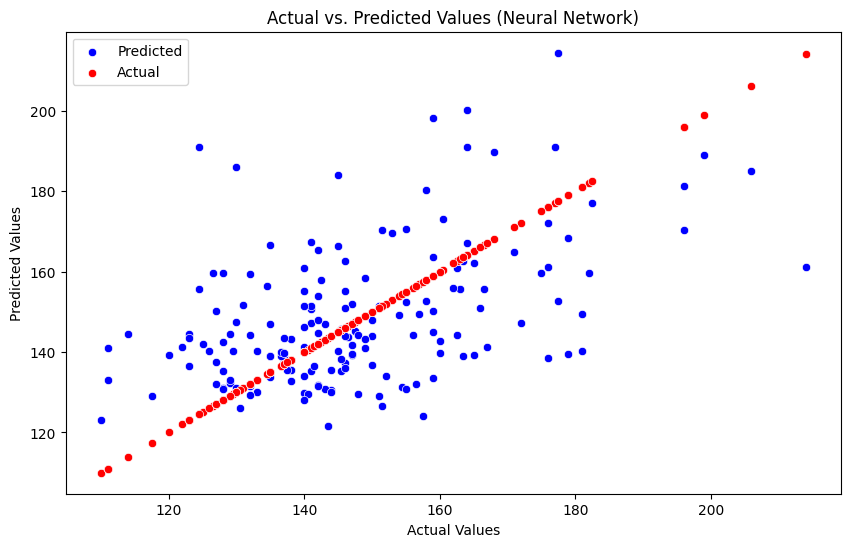

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y3_male_test, y=y3_male_pred_nn.flatten(), color='blue', label='Predicted')
sns.scatterplot(x=y3_male_test, y=y3_male_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.legend()
plt.show()

# Regression Analysis

- After performing regression using the small and large neural networks, we can notice that the predicted values of the larger network fits more closely to the actual values of our dataset compared to the smaller network, this could be due to the smaller network underfitting wherein it occurs when the model is too simple to make out underlying relationships between the variables.